# Bitcoin Prcie Prediction
## RIHAD VARIAWA
### 14-11-2018


## This project is about predicting the price of bitcoin using time series forecasting

Time series forecasting is quite different from other machine learning models because -

1. It is time dependent. So, the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.

2. Along with an increasing or decreasing trend, most time series have some form of seasonality trends, i.e. variations specific to a particular time frame.

Therefore simple ML models cannot be used and hence time series forecasting is a different area of research. This time series model ARIMA (Autoregressive Integrated Moving Average model) is used for forecasting the price of bitcoin.**

I've used the time series model ARIMA and trained a neural network model RNN for predicting the bitcoin prices for future based on previous values and trends.Using ARIMA model which was trained on around 90 data points, an average accuracy of 80–85 % was achieved and using the RNN model an accuracy of almost 95% was achieved. This project was mainly built as Bitcoin is longest running and most well known cryptocurrency and is said to have a great future. Through this project what I wanted to see is if I could quickly train a deep learning model or use the standard time series models to predict Bitcoin prices and its future trends.

### Machine Learning:
The model built gives prediction for bitcoin prices on any date given in the standard Unix format. These predictions could be used as the foundation of a bitcoin trading strategy. The people that bought the stocks when they were at high prices, lost most of their money. This is why it is important not to invest more money than you can afford to lose. Like stock market analysis this too can be used by investors to judge the best time to make investments in order to get best results. Even though there are multiple other factors which can affect the bitcoin price; like the supply and demand, other cryptocurrencies and many others like this can be used as a basic model and the rest factors can be manually studied as most of these factors are unpredictable. It can be used to get a fair idea of the prices and where the investments can be made. Bitcoin is still young and many sources says its here to stay.

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Making predictions with a ML techniques ARMA, Recurrent Neural Network (RNN) with prediction and time series analysis is our main objective.

An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

In [0]:
from google.colab import files
files.upload()

Saving bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv to bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv


In [0]:
df=pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv')

In [0]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [0]:
df.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [0]:
df.shape

(2507, 7)

### Feature Extraction

In [0]:
# Unix-time to 
df.Timestamp = pd.to_datetime(df.Timestamp, unit='s')

# Resampling to daily frequency
df.index = df.Timestamp
df = df.resample('D').mean()

# Resampling to monthly frequency
df_month = df.resample('M').mean()

# Resampling to annual frequency
df_year = df.resample('A-DEC').mean()

# Resampling to quarterly frequency
df_Q = df.resample('Q-DEC').mean()

In [0]:
df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-01-01,4.806667,4.806667,4.806667,4.806667,7.200667,35.259720,4.806667
2012-01-02,5.000000,5.000000,5.000000,5.000000,19.048000,95.240000,5.000000
2012-01-03,5.252500,5.252500,5.252500,5.252500,11.004660,58.100651,5.252500
2012-01-04,5.200000,5.223333,5.200000,5.223333,11.914807,63.119577,5.208159


In [0]:
df.tail(5)

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2018-11-06,6413.198590,6414.012555,6412.502904,6413.364822,3.237555,20786.912728,6413.277403
2018-11-07,6506.845810,6507.861305,6505.976738,6506.953638,3.684440,23981.563361,6506.850121
2018-11-08,6448.508802,6449.444281,6447.496121,6448.523555,3.065667,19760.815030,6448.400227
2018-11-09,6365.194847,6366.161427,6364.184180,6365.227867,2.524023,16059.804290,6365.113235
2018-11-10,6354.595866,6355.569189,6353.543136,6354.722105,1.287738,8180.185437,6354.594869


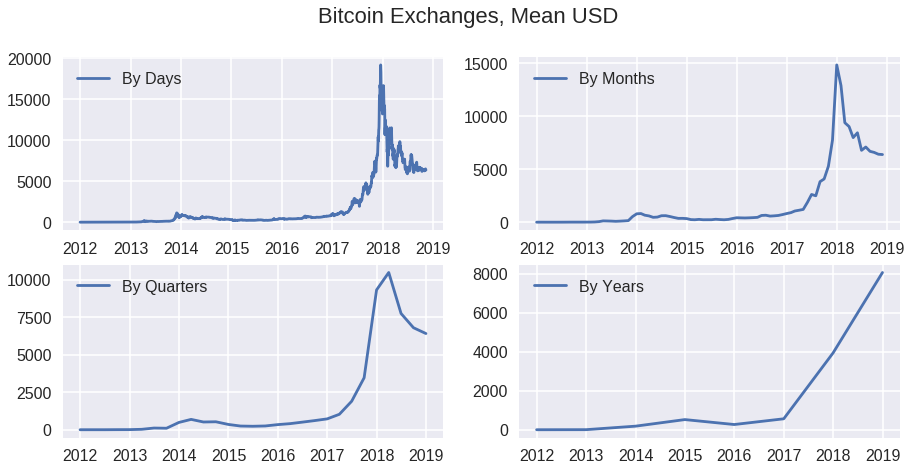

In [0]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin Exchanges, Mean USD', fontsize=22)

plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

**The timestamp in the data was converted to standard UNIX timestamps and for ARIMA the data was grouped by months by taking the mean values and for RNN the data was grouped by the days again taking mean value for each day.**

### Splitting data into train and test set 

In [0]:
split = 80
df_train = df_month[:split]
df_test = df_month[split:len(df_month)]

Dickey–Fuller test: p=0.968518


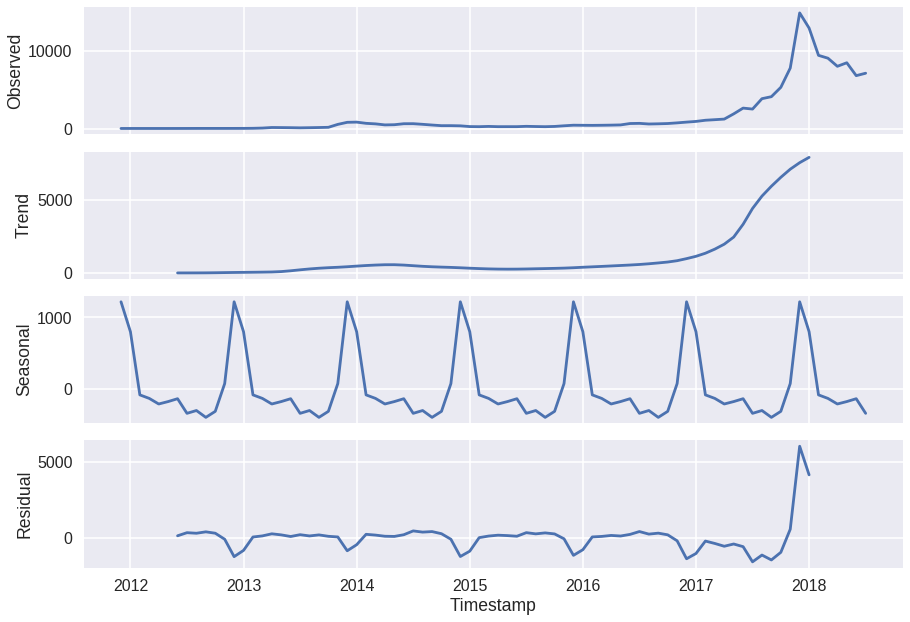

In [0]:
# Stationarity check and STL-decomposition of the series
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(df_train.Weighted_Price).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.Weighted_Price)[1])
plt.show()

In [0]:
# Box-Cox Transformations
df_train['Weighted_Price_box'], lmbda = stats.boxcox(df_train.Weighted_Price)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.Weighted_Price)[1])

Dickey–Fuller test: p=0.968518


In [0]:
# Seasonal differentiation
df_train['prices_box_diff'] = df_train.Weighted_Price_box - df_train.Weighted_Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.022912


Dickey–Fuller test: p=0.003956


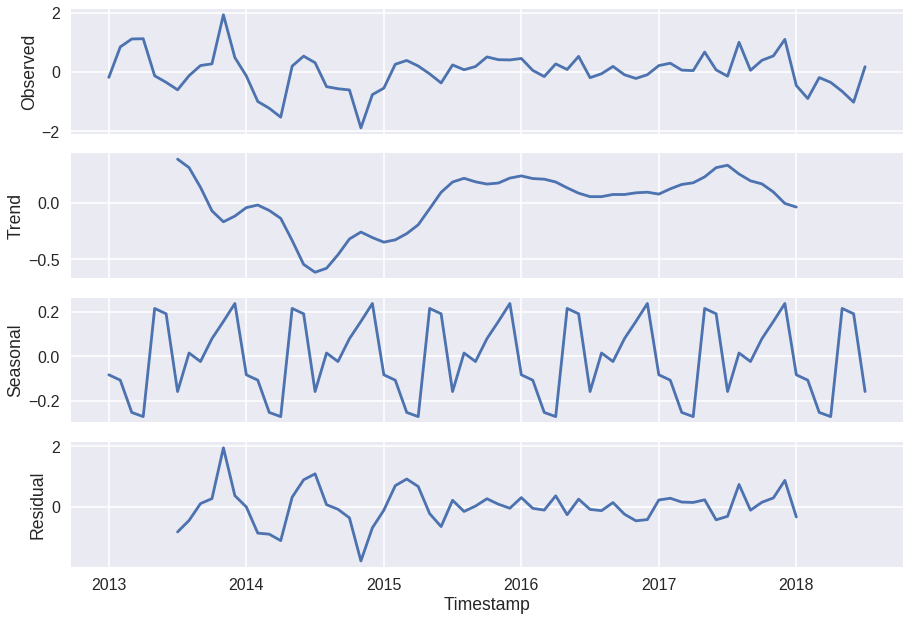

In [0]:
# As the p-value is more than the threshold i.e 5% we conclude : The series are not stationary.

# Regular differentiation
df_train['prices_box_diff2'] = df_train.prices_box_diff - df_train.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(df_train.prices_box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(df_train.prices_box_diff2[13:])[1])

plt.show()

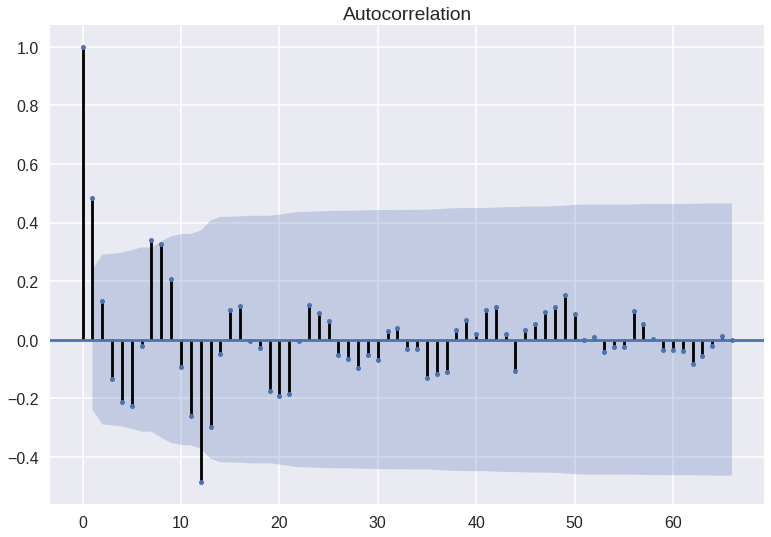

In [0]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_train.prices_box_diff2[13:].values.squeeze())
pyplot.show()

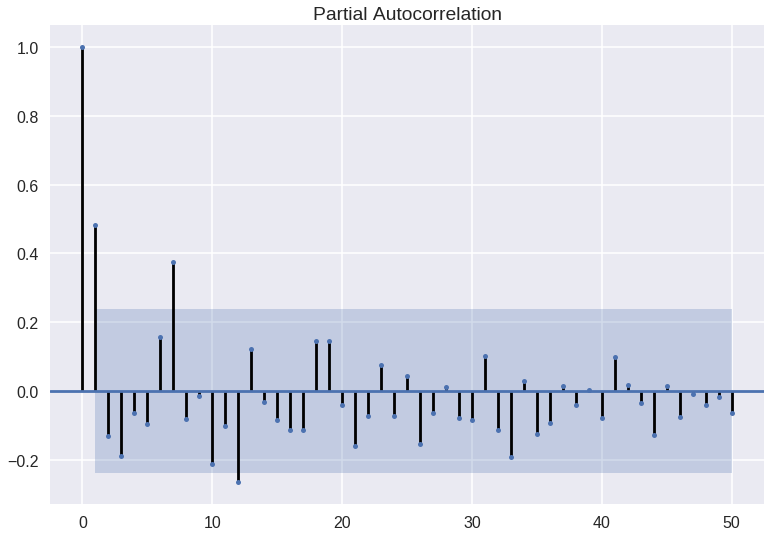

In [0]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_train.prices_box_diff2[13:].values.squeeze(), lags=50)
pyplot.show()

In [0]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(df_train.Weighted_Price_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

wrong parameters: (0, 0, 0, 0)
wrong parameters: (2, 1, 0, 0)
wrong parameters: (2, 1, 0, 1)
wrong parameters: (2, 1, 1, 0)
wrong parameters: (2, 1, 1, 1)
wrong parameters: (2, 1, 2, 0)
wrong parameters: (2, 1, 2, 1)


In [0]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters        aic
18  (1, 0, 0, 1)  85.627332
20  (1, 0, 1, 1)  85.913294
12  (0, 2, 0, 1)  86.860969
6   (0, 1, 0, 1)  87.338825
36  (2, 0, 0, 1)  87.541997


Dickey–Fuller test:: p=0.000000


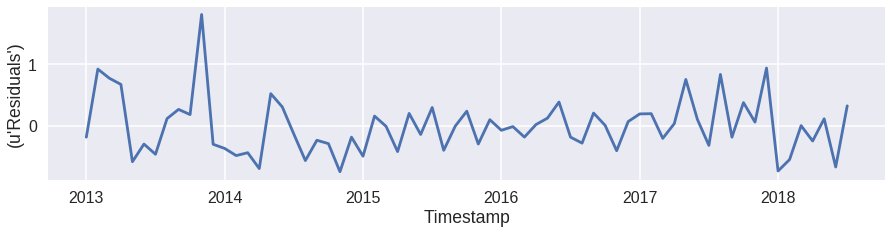

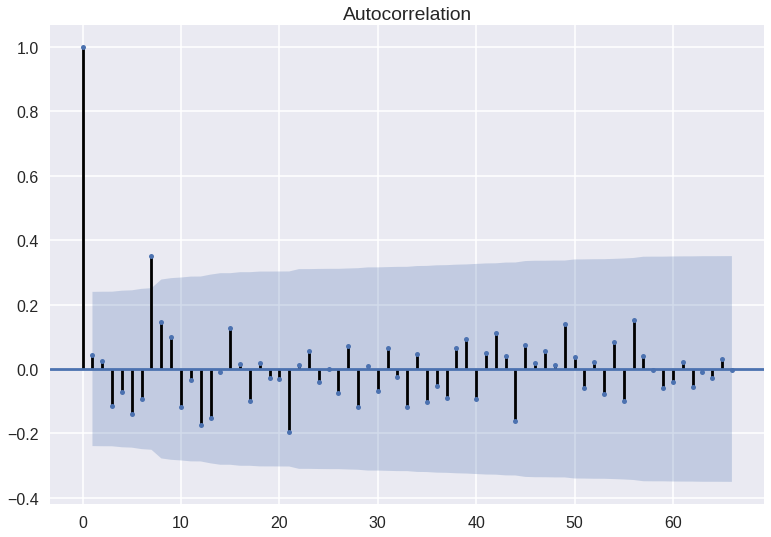

In [0]:
# STL-decomposition

from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf



plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
,plt.ylabel(u'Residuals')

plot_acf(best_model.resid[13:].values.squeeze())

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

pyplot.show()

In [0]:
# Prediction 
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

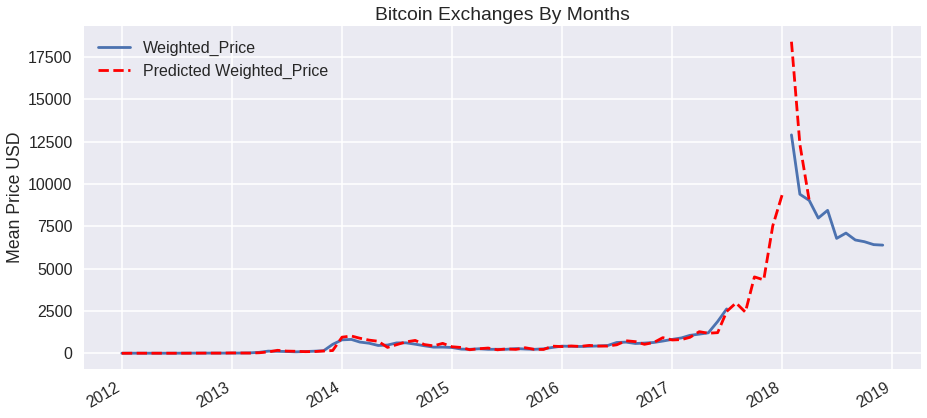

In [0]:
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2017, 6, 30), datetime(2017, 7, 31), datetime(2017, 8, 31), datetime(2017, 9, 30), 
             datetime(2017, 10, 31), datetime(2017, 11, 30), datetime(2017, 12, 31), datetime(2018, 1, 31),
             datetime(2018, 1, 28)]
future = pd.DataFrame(index=date_list, columns= df_month.columns)
df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = invboxcox(best_model.predict(start=0, end=75), lmbda)
plt.figure(figsize=(15,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin Exchanges By Months')
plt.ylabel('Mean Price USD')
plt.show()